# Walmart Recruiting - Store Sales Forecasting -  Step 4: EDA

EDA is an important step and it should be in combination with all previous steps. I use EDA to confirm or reject
my hypothesis regarding the data. For example does the weather affect my sales?<br>
Having said that EDA could be very time consuming so I try to find a good balance and not to be lost in too many
details. In this notebook I will present common plots that I use. Again due to time constraint I didn't go too much
in depth and didn't provide much details but this is to give you a sense of my analysis and I can provide you more
details.


### Take away of the notebook
    . Weekly Sales Distribution across different dimensions
    . Didn't have time to write more details but I can do a presentation
    . other considerations: cumulative weekly sales, explore more in details Weekly Sales peaks related to Holidays

In [233]:
import pandas as pd
import numpy as np
import calendar
from plot_helper import plot_dist

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

plt.style.use('fivethirtyeight')

%matplotlib inline

## loading data

In [194]:
df_train = pd.read_parquet('data/train_extended.parquet')
df_test = pd.read_parquet('data/test_extended.parquet')

df_train['Month_Name'] = df_train.Month.apply(lambda x: calendar.month_name[x])

target = 'Weekly_Sales'
month_idx = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August','September', 'October', 'November', 'December']
df_train.shape, df_test.shape

((421570, 24), (115064, 23))

In [167]:
df_train.head()

,Date,Dept,IsHoliday,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Week,Day,day_of_year,days_in_month,Prev_Year_Weekly_Sales,Month_Name
0,2010-02-05,1,0,1,24924.50,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,5,5,36,28,0.0,February
1,2010-02-12,1,1,1,46039.49,38.51,2.548,NaN,NaN,NaN,...,A,151315,2010,2,6,12,43,28,0.0,February
2,2010-02-19,1,0,1,41595.55,39.93,2.514,NaN,NaN,NaN,...,A,151315,2010,2,7,19,50,28,0.0,February
3,2010-02-26,1,0,1,19403.54,46.63,2.561,NaN,NaN,NaN,...,A,151315,2010,2,8,26,57,28,0.0,February
4,2010-03-05,1,0,1,21827.90,46.50,2.625,NaN,NaN,NaN,...,A,151315,2010,3,9,5,64,31,0.0,March


## Weekly Sales distribution

#### Helper function

In [211]:
def hm_with_title(df, x, y, values, title, x_sorted_idx=None, y_sorted_idx=None, figsize=(15,3), x_rot=0, y_rot=0, **kwargs):
    pv = df.groupby([x, y])[values].sum().reset_index()
    pv = pv.pivot(x, y, values)
    if x_sorted_idx is not None:
        pv = pv.reindex(x_sorted_idx)
    if y_sorted_idx is not None:
        pv = pv.reindex(y_sorted_idx)   
        
    #plot heat map
    plt.figure(figsize=figsize)
    sns.heatmap(pv, cmap="YlGnBu", **kwargs);
    plt.xticks(rotation=x_rot)
    plt.yticks(rotation=y_rot)
    plt.title(title, y=1.05);
    plt.show();

In [189]:
# pd.plotting.scatter_matrix(df_train, figsize=(20,20), alpha=.7);

#### Weekly Sales plot line acrros the years

massive sales occured during the week of Xmas and Thanksgiving

top 5 highest overall weekly sales duirng year of 2010


,Date,Weekly_Sales
0,2010-12-24,80931415.60
1,2010-11-26,65821003.24
2,2010-12-17,61820799.85
3,2010-12-10,55666770.39
4,2010-04-02,50423831.26


top 5 highest overall weekly sales duirng year of 2011


,Date,Weekly_Sales
0,2011-12-23,76998241.31
1,2011-11-25,66593605.26
2,2011-12-16,60085695.94
3,2011-12-09,55561147.70
4,2011-12-02,49390556.49


top 5 highest overall weekly sales duirng year of 2012


,Date,Weekly_Sales
0,2012-04-06,53502315.87
1,2012-07-06,51253021.88
2,2012-02-17,50197056.96
3,2012-02-10,50009407.92
4,2012-06-08,49651171.78


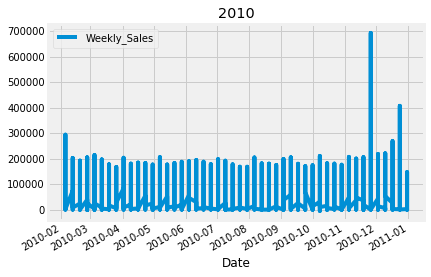

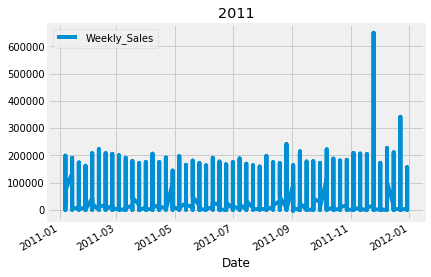

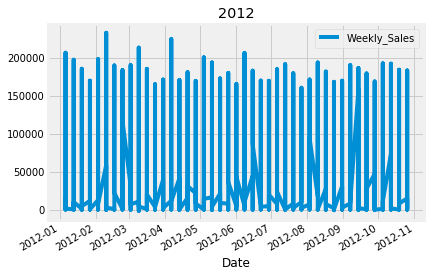

In [292]:
years = [2010, 2011, 2012]
for year in years:
    df = df_train[df_train.Date.dt.year==year]
    top_5_weeks = df.groupby('Date').Weekly_Sales.sum().nlargest(5).sort_values(ascending=False).head().reset_index()
    print('top 5 highest overall weekly sales duirng year of {}'.format(year))
    display(top_5_weeks)
    df.plot('Date', target, title=year);
#     display(df.loc[df['Week'].isin(top_5_weeks['Week']), ['Year', 'Date', target]].sort_values(by=target, ascending=False))

#### Overall Weekly Sales across year/week./month dimensions

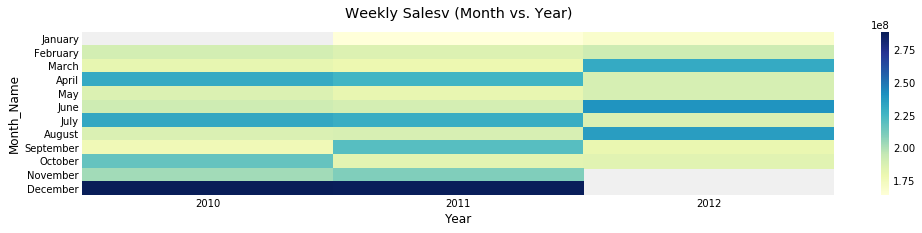

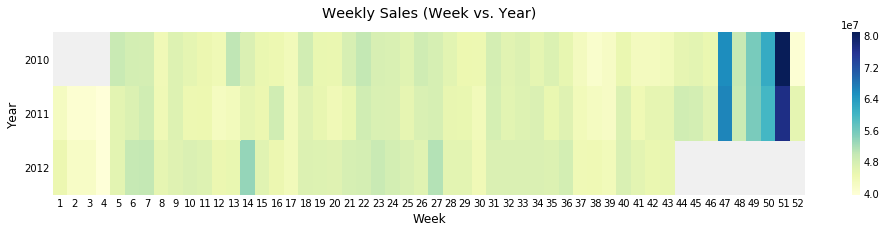

In [219]:
hm_with_title(df_train, 'Month_Name', 'Year', target, 'Weekly Salesv (Month vs. Year)', y_sorted_idx=month_idx)
hm_with_title(df_train, 'Year', 'Week', target, 'Weekly Sales (Week vs. Year)')

#### Overall Weekly Sales across stores/dept

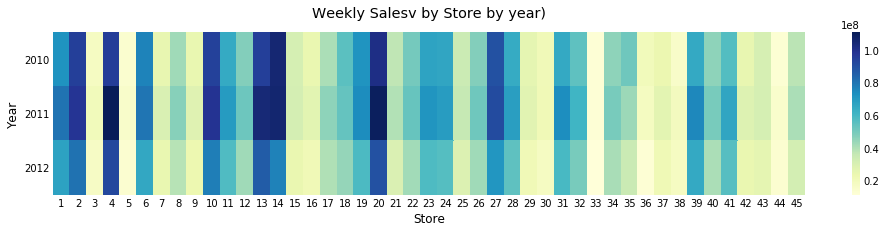

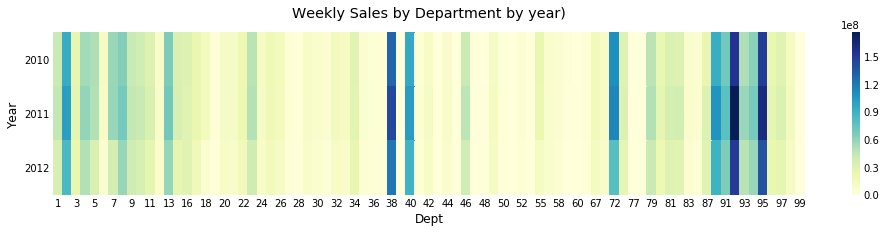

In [213]:
hm_with_title(df_train, 'Year', 'Store', target, 'Weekly Salesv by Store by year)')
hm_with_title(df_train, 'Year', 'Dept', target, 'Weekly Sales by Department by year)')

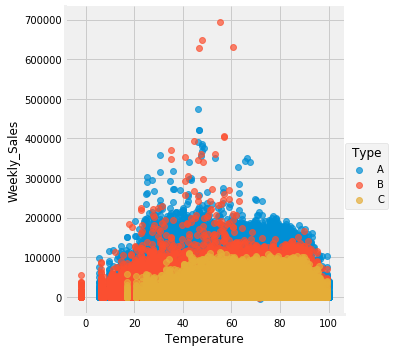

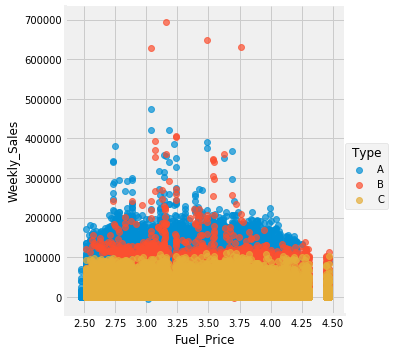

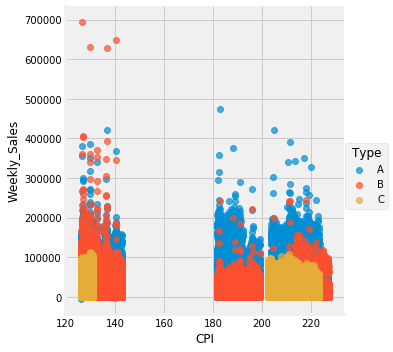

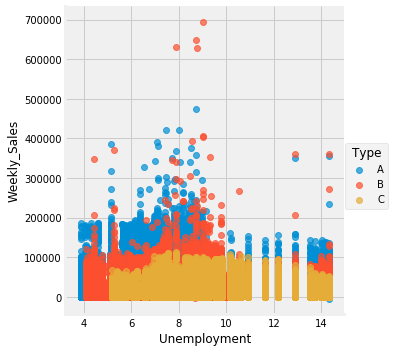

In [222]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in cols:
    sns.lmplot(x=col, y='Weekly_Sales', data=df_train, hue='Type',
           fit_reg=False, legend=True, scatter_kws={'alpha':0.7});

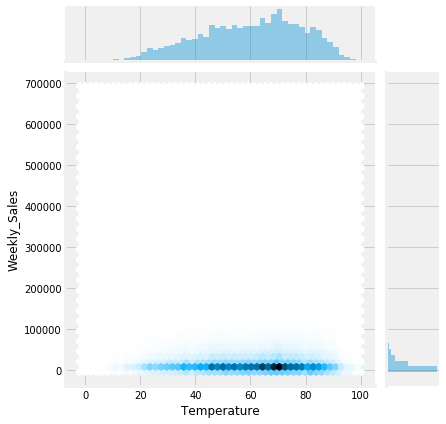

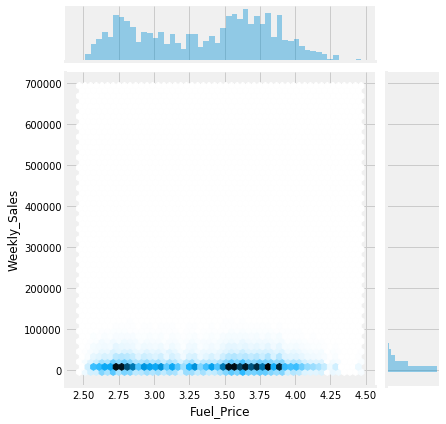

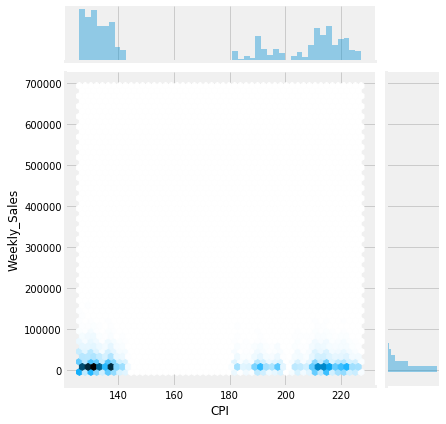

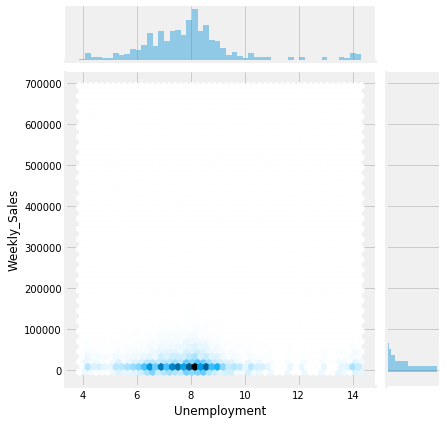

In [232]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in cols:
    sns.jointplot(x=col, y=target, kind='hex', data=df_train, stat_func=None);
    

#### Weekly sales distibution for a specific store

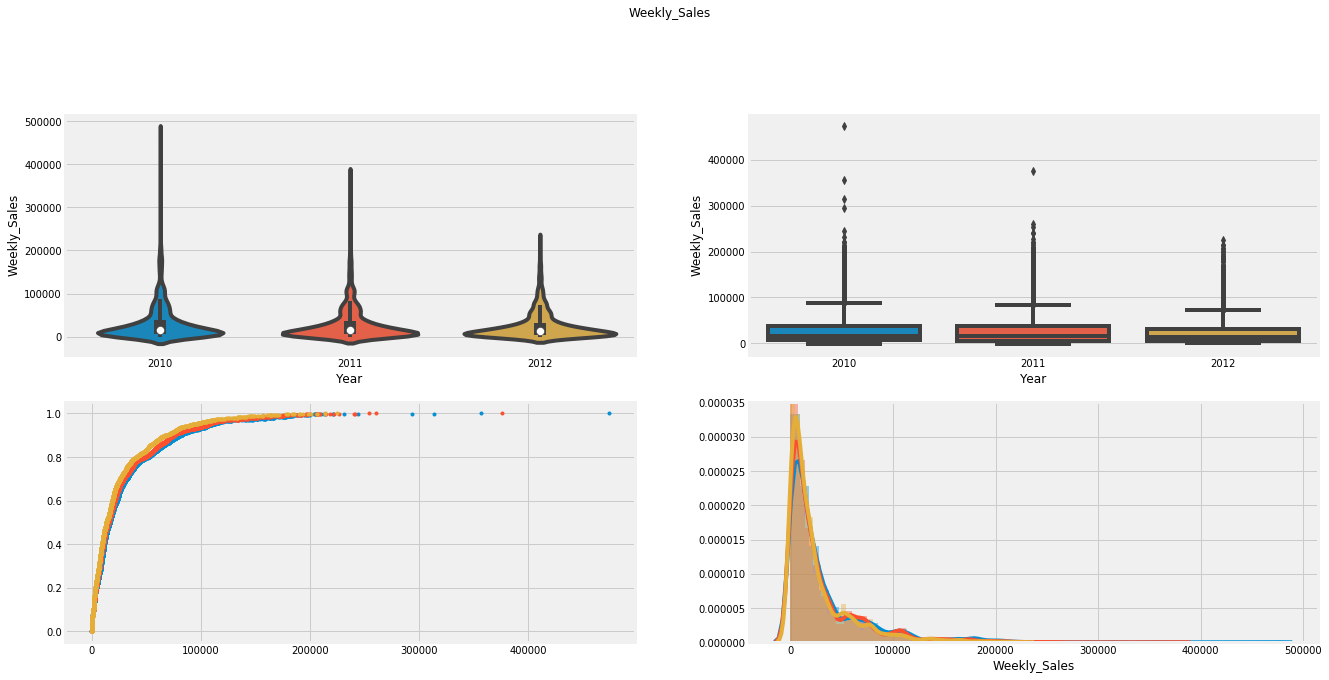

In [244]:
df=df_train[df_train.Store==14]
plot_dist(df, value=target, groupby='Year')

#### Weekly sales distibution for a specific department

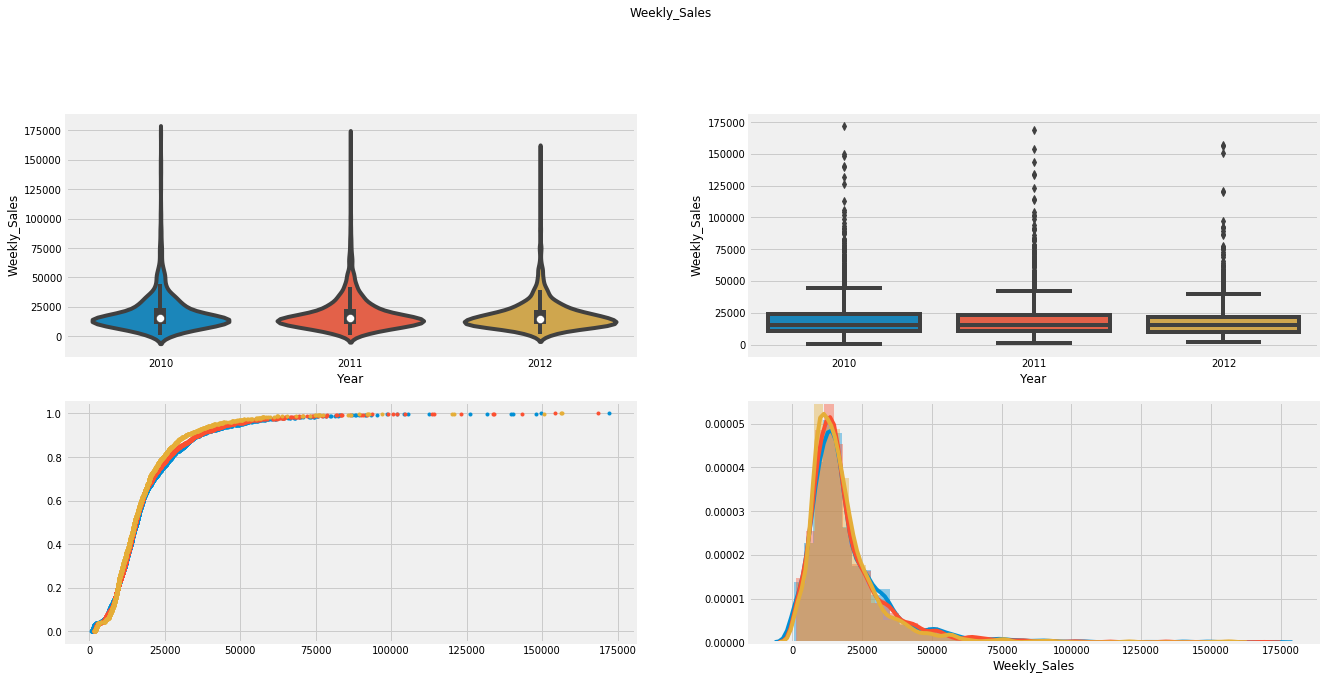

In [237]:
df=df_train[df_train.Dept==1]
plot_dist(df, value=target, groupby='Year')